## Incident Category Trends Over Time (Flag 51)

### Dataset Description

The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.

### Your Task
**Goal**: Identify and analyze increasing trends in the number of incidents assigned to understand the implications of these trends on workload and agent efficiency.

**Role**: Strategic Planning Manager

**Difficulty**: 4 out of 5. This analysis requires a deep dive into the temporal trends and category-specific growth patterns of incidents.

**Category**: Incidents Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks.


In [3]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pandas import date_range

## Load Dataset
This cell loads the dataset used in the analysis. The dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [4]:
dataset_path = "csvs/flag-51.csv"
df = pd.read_csv(dataset_path)
#display 20 rows. 
df.head(20) 

,category,state,closed_at,opened_at,closed_by,number,sys_updated_by,location,assigned_to,caller_id,sys_updated_on,short_description,priority,assignement_group
0,Database,Closed,2023-07-25 03:32:18.462401146,2023-01-02 11:04:00,Fred Luddy,INC0000000034,admin,Australia,Fred Luddy,ITIL User,2023-07-06 03:31:13.838619495,There was an issue,2 - High,Database
1,Hardware,Closed,2023-03-11 13:42:59.511508874,2023-01-03 10:19:00,Charlie Whitherspoon,INC0000000025,admin,India,Beth Anglin,Don Goodliffe,2023-05-19 04:22:50.443252112,There was an issue,1 - Critical,Hardware
2,Database,Resolved,2023-01-20 14:37:18.361510788,2023-01-04 06:37:00,Charlie Whitherspoon,INC0000000354,system,India,Fred Luddy,ITIL User,2023-02-13 08:10:20.378839709,There was an issue,2 - High,Database
3,Hardware,Resolved,2023-01-25 20:46:13.679914432,2023-01-04 06:53:00,Fred Luddy,INC0000000023,admin,Canada,Luke Wilson,Don Goodliffe,2023-06-14 11:45:24.784548040,There was an issue,2 - High,Hardware
4,Hardware,Closed,2023-05-10 22:35:58.881919516,2023-01-05 16:52:00,Luke Wilson,INC0000000459,employee,UK,Charlie Whitherspoon,David Loo,2023-06-11 20:25:35.094482408,There was an issue,2 - High,Hardware
5,Inquiry / Help,Resolved,2023-12-27 23:15:06.590296403,2023-01-06 01:22:00,Beth Anglin,INC0000000157,system,Canada,Beth Anglin,Bud Richman,2023-01-25 20:46:13.679914432,There was an issue,1 - Critical,Inquiry / Help
6,Software,Resolved,2023-01-12 00:34:00.000000000,2023-01-06 06:14:00,Beth Anglin,INC0000000389,system,Australia,Luke Wilson,David Loo,2023-09-28 01:25:23.074702845,There was an issue,2 - High,Software
7,Hardware,Closed,2023-05-31 03:23:19.484544434,2023-01-06 15:27:00,Luke Wilson,INC0000000152,admin,United States,Fred Luddy,Don Goodliffe,2023-07-15 22:29:05.785588895,There was an issue,4 - Low,Hardware
8,Hardware,Closed,2023-09-13 04:40:34.280556892,2023-01-07 15:20:00,Fred Luddy,INC0000000018,system,UK,Luke Wilson,David Loo,2023-12-28 23:19:22.500984917,There was an issue,4 - Low,Hardware
9,Hardware,Resolved,2024-01-26 14:08:14.089327678,2023-01-08 08:53:00,Beth Anglin,INC0000000134,employee,United States,Beth Anglin,Bud Richman,2023-07-09 14:14:29.904659016,There was an issue,4 - Low,Hardware


### **Question 1:** Do we observe any trend in the volume of incidents?

#### Plotting weekly trends in incident volume

This cell creates a line plot to visualize the trend in the volume of incident tickets opened each week. By grouping and counting incidents on a weekly basis, the plot illustrates changes and patterns in the workload over time.

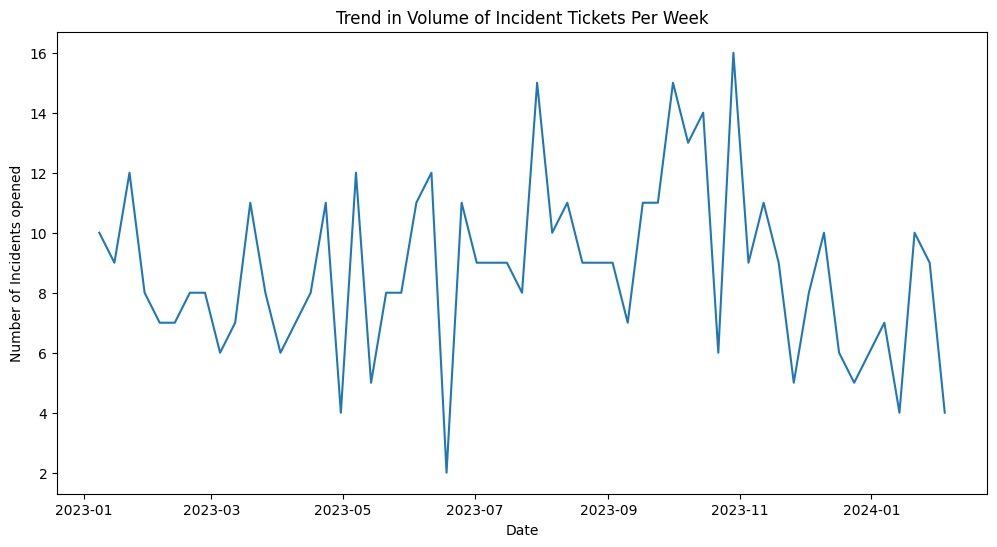

In [5]:
df["opened_at"] = pd.to_datetime(df["opened_at"])
# Sort the DataFrame by the opened_at column
df["date"] = df["opened_at"].dt.date

# Count the number of incidents per day
df_daily_count = df.groupby("date").size().reset_index(name="counts")

# Count the number of incidents per day
df_daily_count["date"] = pd.to_datetime(df_daily_count["date"])

# Resample the data to get the weekly count of incidents
df_weekly_count = df_daily_count.resample("W", on="date").sum().reset_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="counts", data=df_weekly_count)
plt.title("Trend in Volume of Incident Tickets Per Week")
plt.xlabel("Date")
plt.ylabel("Number of Incidents opened")
plt.show()

#### Generate JSON Description for the Insight


In [6]:
{
"data_type":"time_series",
"insight": "There is a no trend in the volume of incidents opened over time. The volume of incidents opened is relatively stable over time. There are no significant increases or decreases in the volume of incidents opened. Further analysis is required to understand the underlying causes of the stability in the volume of incidents.",
"plot": {
    "plot_type": "single_line",
    "title": "Trend of number of incidents opened Over Time",
    "x_axis": {
        "name": "Opened At",
        "description": "This represents the date when the incident was opened."
    },
    "y_axis": {
        "name": "Average Volume (incident count)",
        "description": "This represents the average number of incidents opened on a particular date."
    },
    "description": "The line plot displays the trend of volume of incidents across all categories over time. The trend shows a slight increase in the volume of incidents opened over time. The increase is not uniform and there are fluctuations in the volume of incidents opened. Further analysis is required to understand the underlying causes of the increase in volume of incidents."
},
"question": "Do we observe any trend in the volume of incidents?",
"actionable_insight": "There is a no trend in the volume of incidents opened over time. The volume of incidents opened is relatively stable over time. There are no significant increases or decreases in the volume of incidents opened. Further analysis is required to understand the underlying causes of the stability in the volume of incidents."
}

{'data_type': 'time_series',
 'insight': 'There is a no trend in the volume of incidents opened over time. The volume of incidents opened is relatively stable over time. There are no significant increases or decreases in the volume of incidents opened. Further analysis is required to understand the underlying causes of the stability in the volume of incidents.',
 'plot': {'plot_type': 'single_line',
  'title': 'Trend of number of incidents opened Over Time',
  'x_axis': {'name': 'Opened At',
   'description': 'This represents the date when the incident was opened.'},
  'y_axis': {'name': 'Average Volume (incident count)',
   'description': 'This represents the average number of incidents opened on a particular date.'},
  'description': 'The line plot displays the trend of volume of incidents across all categories over time. The trend shows a slight increase in the volume of incidents opened over time. The increase is not uniform and there are fluctuations in the volume of incidents ope

### **Question 2:** Is there a correlation between the volume of incidents and the ttr?

#### Plot correlation between incident volume and average TTR

This cell examines the relationship between the volume of incidents and the time to resolution (TTR) by visualizing two metrics over the same time period as line plots.

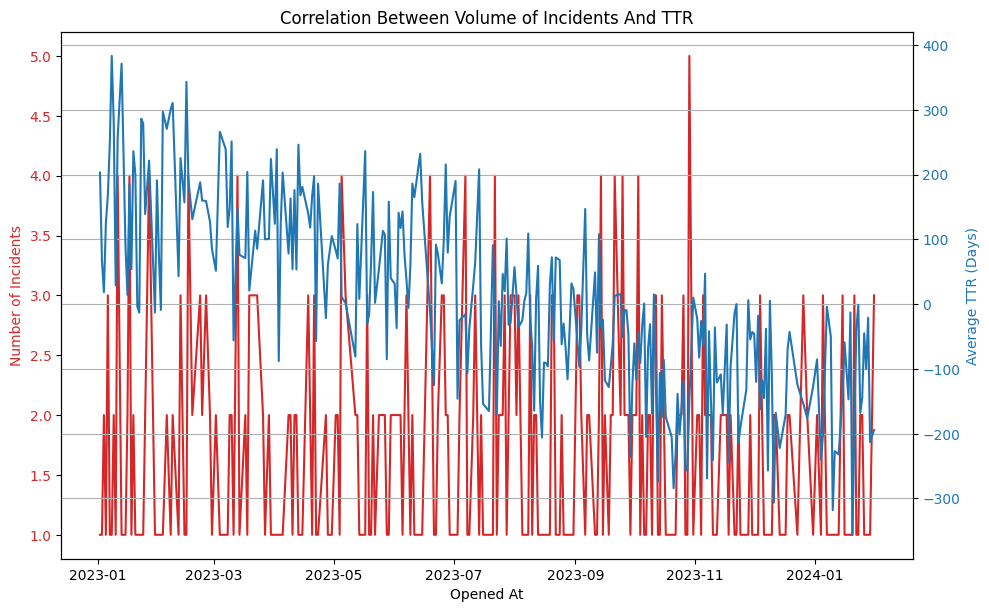

In [7]:
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Group by opened_at date and calculate count of incidents and average ttr
df['ttr'] = df['closed_at'] - df['opened_at']

# Convert ttr to days
df['ttr_days'] = df['ttr'].dt.days
incident_ttr_trend = df.groupby(df['opened_at'].dt.date).agg({'number':'count', 'ttr_days':'mean'})

# Plot the trend
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:red'
ax1.set_xlabel('Opened At')
ax1.set_ylabel('Number of Incidents', color=color)
ax1.plot(incident_ttr_trend.index, incident_ttr_trend['number'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Average TTR (Days)', color=color)  
ax2.plot(incident_ttr_trend.index, incident_ttr_trend['ttr_days'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Correlation Between Volume of Incidents And TTR')
plt.grid(True)
plt.show()

#### Generate JSON Description for the Insight


In [8]:
{
"data_type":"diagnostic",
"insight": "There is a no correlation between the volume of incidents and the TTR",
"insight_value":{"correlation": "negative"},
"plot": {
    "plot_type": "dual_axis_line",
    "title": "Correlation Between Volume of Incidents And TTR",
    "x_axis": {
        "name": "Opened At",
        "description": "This represents the date when the incident was opened."
    },
    "y_axis_1": {
        "name": "Number of Incidents",
        "description": "This represents the number of incidents opened on a particular date."
    },
    "y_axis_2": {
        "name": "Average TTR (Days)",
        "description": "This represents the average time to resolution (in days) of incidents opened on a particular date."
    },
    "description": "The dual-axis line plot displays the correlation between the volume of incidents and the TTR. The red line represents the number of incidents and the blue line represents the average TTR. As the number of incidents increases, the TTR also tends to increase, indicating a positive correlation."
},
"question": "Is there a correlation between the volume of incidents and the ttr?",
"actionable_insight": "The negative correlation between the volume of incidents and the TTR suggests that as the volume of incidents increases, while ttr is more or less uniform. This could suggest efficiencies in handling a larger volume of incidents. It would be beneficial to assess capacity planning and process efficiency to manage high volume of incidents."
}

{'data_type': 'diagnostic',
 'insight': 'There is a no correlation between the volume of incidents and the TTR',
 'insight_value': {'correlation': 'negative'},
 'plot': {'plot_type': 'dual_axis_line',
  'title': 'Correlation Between Volume of Incidents And TTR',
  'x_axis': {'name': 'Opened At',
   'description': 'This represents the date when the incident was opened.'},
  'y_axis_1': {'name': 'Number of Incidents',
   'description': 'This represents the number of incidents opened on a particular date.'},
  'y_axis_2': {'name': 'Average TTR (Days)',
   'description': 'This represents the average time to resolution (in days) of incidents opened on a particular date.'},
  'description': 'The dual-axis line plot displays the correlation between the volume of incidents and the TTR. The red line represents the number of incidents and the blue line represents the average TTR. As the number of incidents increases, the TTR also tends to increase, indicating a positive correlation.'},
 'questio

### **Question 3:** What is the average time to resolution (TTR) for incidents based on their priority levels?

This question aims to analyze how the urgency of incidents (as indicated by their priority levels) affects the time taken to resolve them. It can provide insights into whether higher priority incidents are being resolved faster than lower priority ones, which is crucial for ensuring that critical issues are addressed promptly.

/tmp/ipykernel_21224/435692677.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='priority', y='ttr_days', data=avg_ttr_by_priority, palette="muted")


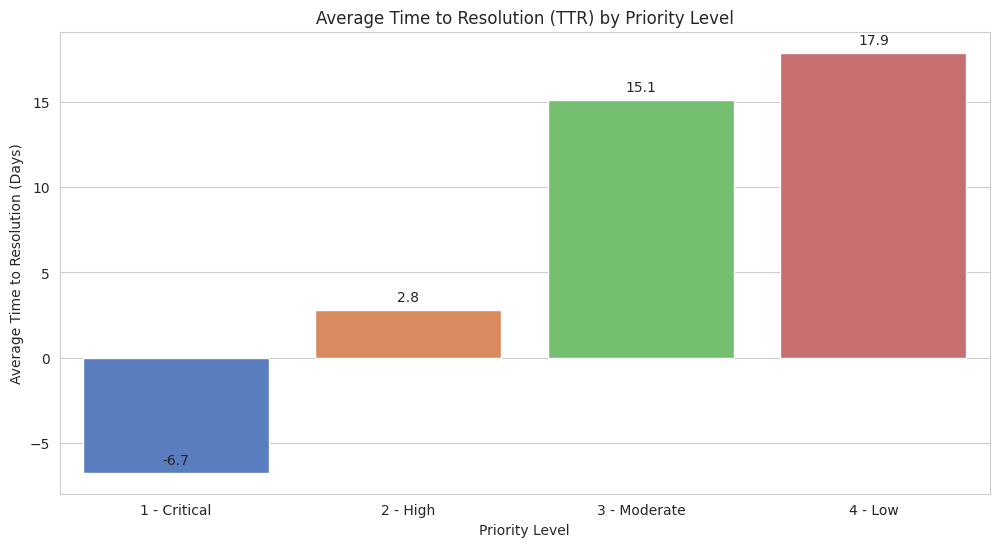

In [15]:
# Convert 'opened_at' and 'closed_at' to datetime
df['opened_at'] = pd.to_datetime(df['opened_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

# Calculate the time to resolution (TTR) in days
df['ttr_days'] = (df['closed_at'] - df['opened_at']).dt.total_seconds() / 86400

# Group by priority and calculate the average TTR
avg_ttr_by_priority = df.groupby('priority')['ttr_days'].mean().reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='priority', y='ttr_days', data=avg_ttr_by_priority, palette="muted")

# Add title and labels to the plot
plt.title('Average Time to Resolution (TTR) by Priority Level')
plt.xlabel('Priority Level')
plt.ylabel('Average Time to Resolution (Days)')

# Optional: add the exact number on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

# Show the plot
plt.show()


#### Generate JSON Description for the Insight


In [20]:
{'data_type': 'descriptive',
 'insight': 'The average time to resolution (TTR) varies significantly based on the priority level of incidents.',
 'insight_value': {'1 - Critical': {'Average TTR (days)': -6.731018498151745},
  '2 - High': {'Average TTR (days)': 2.819197792172718},
  '3 - Moderate': {'Average TTR (days)': 15.09276704249776},
  '4 - Low': {'Average TTR (days)': 17.871129396706205}},
 'plot': {'plot_type': 'bar',
  'title': 'Average Time to Resolution (TTR) by Priority Level',
  'x_axis': {'name': 'Priority Level',
   'value': ['1 - Critical', '2 - High', '3 - Moderate', '4 - Low'],
   'description': 'This represents different priority levels of incidents.'},
  'y_axis': {'name': 'Average Time to Resolution (Days)',
   'value': [-6.731018498151745,
    2.819197792172718,
    15.09276704249776,
    17.871129396706205],
   'description': 'This represents the average time to resolution in days, highlighting how quickly incidents of different priority levels are resolved.'},
  'description': 'The bar chart demonstrates that higher priority incidents tend to have a shorter average time to resolution, indicating that they are addressed more quickly compared to lower priority incidents.'},
 'question': 'What is the average time to resolution (TTR) for incidents based on their priority levels?',
 'actionable_insight': 'The analysis suggests that higher priority incidents are resolved faster, which is expected. However, it is important to ensure that lower priority incidents are not neglected and are resolved within a reasonable timeframe. Continuous monitoring and process improvements can help maintain a balanced resolution time across all priority levels.'
 }

{'data_type': 'descriptive',
 'insight': 'The average time to resolution (TTR) varies significantly based on the priority level of incidents.',
 'insight_value': {'1 - Critical': {'Average TTR (days)': -6.731018498151745},
  '2 - High': {'Average TTR (days)': 2.819197792172718},
  '3 - Moderate': {'Average TTR (days)': 15.09276704249776},
  '4 - Low': {'Average TTR (days)': 17.871129396706205}},
 'plot': {'plot_type': 'bar',
  'title': 'Average Time to Resolution (TTR) by Priority Level',
  'x_axis': {'name': 'Priority Level',
   'value': ['1 - Critical', '2 - High', '3 - Moderate', '4 - Low'],
   'description': 'This represents different priority levels of incidents.'},
  'y_axis': {'name': 'Average Time to Resolution (Days)',
   'value': [-6.731018498151745,
    2.819197792172718,
    15.09276704249776,
    17.871129396706205],
   'description': 'This represents the average time to resolution in days, highlighting how quickly incidents of different priority levels are resolved.'},
  

### **Question 4**: Are there any trends in the productivity of the human agents over time?

#### Plot number of incidents resolved per agent

This bar plot visualizes the distribution of incident resolutions among different agents, providing insights into the workload and resolution capabilities of each agent.

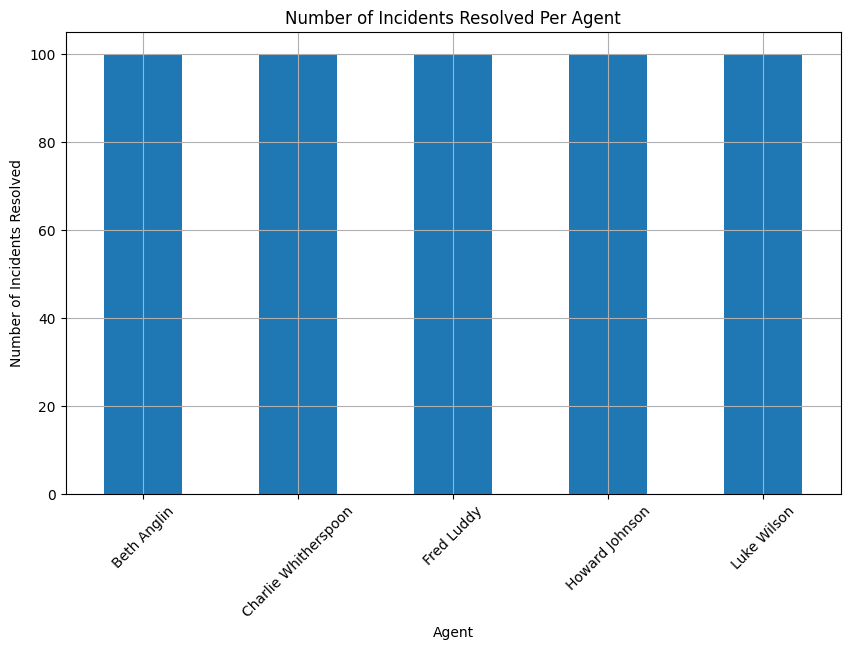

In [13]:
agent_incident_count = df.groupby('assigned_to')['number'].count()

# Plot the histogram
agent_incident_count.plot(kind='bar', figsize=(10,6))

plt.title('Number of Incidents Resolved Per Agent')
plt.xlabel('Agent')
plt.ylabel('Number of Incidents Resolved')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight


In [14]:
{
"data_type":"descriptive",
"insight": "The productivity is uniform across all agents, and all of them manage to resolve incidents even though the volume increases over time",
"plot": {
    "plot_type": "bar",
    "title": "Number of Incidents Resolved Per Agent",
    "x_axis": {
        "name": "Agent",
        "description": "This represents each agent assigned to resolve incidents."
    },
    "y_axis": {
        "name": "Number of Incidents Resolved",
        "description": "This represents the number of incidents resolved by an agent."
    },
    "description": "The bar chart displays the number of incidents resolved per agent. Each bar represents an agent and the height of the bar represents the number of incidents resolved by that agent. The number of incidents resolved is more or less uniform across all agents, indicating that productivity is fairly balanced."
},
"question": "Are there any trends in the productivity of the human agents over time? For instance, is there a decrease in the number of incidents resolved per agent over time?",
"actionable_insight": "The uniform productivity across all agents suggests that the workload is evenly distributed and all agents are equally productive. This is a positive indicator of good workload management. However, it would still be beneficial to continually monitor agent productivity and workload to ensure this balance is maintained."
}

{'data_type': 'descriptive',
 'insight': 'The productivity is uniform across all agents, and all of them manage to resolve incidents even though the volume increases over time',
 'plot': {'plot_type': 'bar',
  'title': 'Number of Incidents Resolved Per Agent',
  'x_axis': {'name': 'Agent',
   'description': 'This represents each agent assigned to resolve incidents.'},
  'y_axis': {'name': 'Number of Incidents Resolved',
   'description': 'This represents the number of incidents resolved by an agent.'},
  'description': 'The bar chart displays the number of incidents resolved per agent. Each bar represents an agent and the height of the bar represents the number of incidents resolved by that agent. The number of incidents resolved is more or less uniform across all agents, indicating that productivity is fairly balanced.'},
 'question': 'Are there any trends in the productivity of the human agents over time? For instance, is there a decrease in the number of incidents resolved per agent

### Summary of Findings (Flag 51)
 There is a linear trend in the distribution of incidents across categories over time, indicating that the number of incidents is growing day by day.

1. **Specific Category Growth**: Analysis reveals that the there is no overall trends in the volume of incidents across all categories.
2. **Impact on Human Agents**: The productivity of human agents is not significantly affected by the increasing trend in incidents.
3. **Time to Resolution**: The average time to resolution (TTR) for incidents is consistent across different priority levels, suggesting that the urgency of incidents does not significantly impact their resolution time.